In [1]:
import os
import argparse
import os
import torch
from exp.exp_main import Exp_Main
import random
import numpy as np
from utils.tools import dotdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import os
import datetime
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

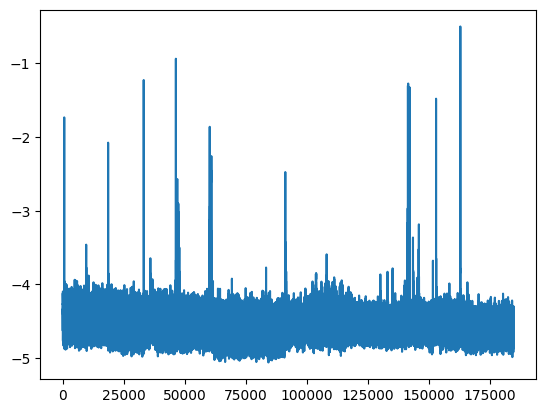

In [2]:
def get_ds(index,start_ts=0,step=60):
    index_tmp=index*step+start_ts
    date=datetime.datetime.fromtimestamp(index_tmp).strftime('%Y-%m-%d %H:%M:%S')
    date=pd.Timestamp(date)
    return date

def norm(value):
    # if value>0.05:
    #     return 0.05
    if value<0.005:
        return 0.0108-0.0023
    else:
        return value

df=pd.read_csv('datasets/data.csv')

df['index']=range(df.__len__())
df['date']=df['index'].map(get_ds)

# df['ts_norm']=df['index'].map(get_norm_time)

# del df['index']
del df['id']

df['e_mu_current']=df['e_mu_current'].map(norm)

# df['OT']=np.log(df['OT'])
# df['e_nu_1']=np.log(df['e_nu_1'])
# df['e_nu_2']=np.log(df['e_nu_2'])
# df['q_mu']=np.log(df['q_mu'])
# df['q_nu1']=np.log(df['q_nu1'])
# df['q_nu2']=np.log(df['q_nu2'])
df['e_mu_current']=np.log(df['e_mu_current'])


# df['e_mu_current']=(df['e_mu_current']-np.mean(df['e_mu_current']))/np.std(df['e_mu_current'])

plt.plot(df['e_mu_current'])
plt.show()

In [ ]:
print(np.max(np.exp(df['e_mu_current'])))
print(np.min(np.exp(df['e_mu_current'])))
print(np.mean((df['e_mu_current'])))
print(np.std(df['e_mu_current']))

In [3]:
outliers=pd.read_csv('./../datasets_qrate/outliers_info.csv')[['index','class','steps_to_anomaly']]

def replace_str(value):
    if value=='anomaly':
        return 1
    else:
        return 0

outliers['class']=outliers['class'].map(replace_str)
outliers

,index,class,steps_to_anomaly
0,592,0,10
1,593,0,9
2,594,0,8
3,595,0,7
4,596,0,6
...,...,...,...
3239,163001,1,0
3240,163002,1,0
3241,163003,1,0
3242,163004,1,0


In [5]:
df_outliers=df.iloc[outliers['index']]

df_non_outliers = pd.merge(df,df_outliers, on='index',how='left')
df_non_outliers = df[~df.isin(df_outliers)].dropna()

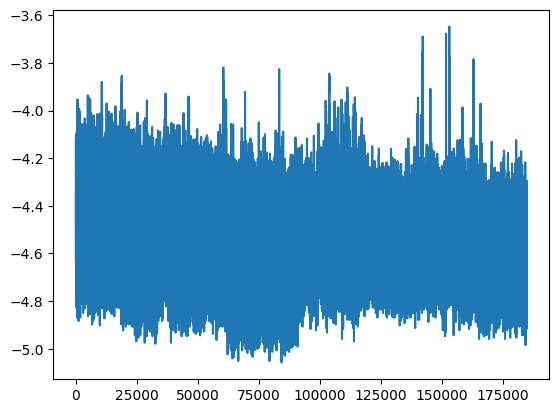

In [6]:
plt.plot(df_non_outliers['e_mu_current'])
plt.show()

In [7]:
del df_non_outliers['index']
del df_outliers['index']

print(len(df_non_outliers))
print(len(df_non_outliers)*0.1)
print(len(df_outliers))
print(len(df_outliers)*0.1)

181606
18160.600000000002
3244
324.40000000000003


In [8]:
df_non_outliers.iloc[:-18160].to_csv('datasets/non_outliers_step=60_log_inf_train=0.9.csv',index=False,)
df_non_outliers.iloc[-18160:].to_csv('datasets/non_outliers_step=60_log_inf_test=0.1.csv',index=False,)

df_outliers.iloc[:-300].to_csv('datasets/outliers_step=60_log_inf_train=0.9.csv',index=False,)
df_outliers.iloc[-300:].to_csv('datasets/outliers_step=60_log_inf_test=0.1.csv',index=False,)

In [ ]:
# df=pd.read_csv('datasets/outliers_step=120_log_inf_train=0.9.csv')
plt.plot(df['e_mu_current'])
plt.show()


In [ ]:

# fix_seed = 2021
# np.random.seed(fix_seed)
# torch.manual_seed(fix_seed)
# np.random.seed(fix_seed)